In [1]:
import numpy as np
from matplotlib import pyplot as plt
import scipy
from numpy import matlib
from scipy import signal

## Make plot comparing ideal sampling to averaged sampling

In [24]:
t = np.arange(0,10,0.001)
x = np.sin(2*np.pi*t*0.223546 + 3)*(np.sin(2*np.pi*t) + 2*np.sin(2*np.pi*0.4*t))

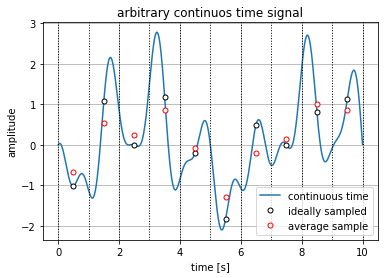

In [81]:
# continuous time
plt.plot(t,x, label='continuous time')

# sampled
plt.plot(t[500::1000], x[500::1000], 'wo', markeredgecolor='k', markersize=5, label='ideally sampled')
plt.plot(t[500::1000], x_mid, 'wo', markeredgecolor='red', markersize=5, label='average sample')
#plt.plot(sample_widths, 
plt.ylabel('amplitude')
plt.xlabel('time [s]')
plt.grid()
plt.title('arbitrary continuos time signal')
plt.legend()

ylims = plt.gca().get_ylim()
sample_widths = np.arange(0,11, 1)
sample_widths = np.vstack((sample_widths, sample_widths))
ys = matlib.repmat(ylims, 11,1)
plt.plot(sample_widths, ys.T, 'k:', linewidth=1)
plt.ylim(ylims)

plt.savefig('figures/ts_sampling.png', dpi=300)

## Plot some sinc functions

In [2]:
fs = 1
Ts = 1/fs
timewidth = 10

f = np.arange(-timewidth/2,timewidth/2,1/1000)
#omega = np.linspace(-6*np.pi,6*np.pi,1000)

Pf = Ts*np.sin(np.pi*Ts*(2*np.pi*f)/(2*np.pi))/(np.pi*Ts*(2*np.pi*f)/2*np.pi)

In [66]:
pad_num = 1000000
P_int = np.zeros(np.pad(Pf, pad_num).shape)
for k in range(-timewidth, timewidth):
    P_int += np.roll(np.pad(Pf, pad_num), k*1000)
    
P_int = P_int[pad_num:-pad_num]

Text(0.5, 0, 'frequency')

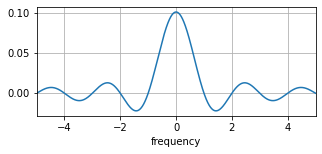

In [81]:
plt.figure(figsize=(5,2))
plt.plot(f, Pf)
plt.grid()
plt.xlim([-5,5])
plt.xlabel('frequency')

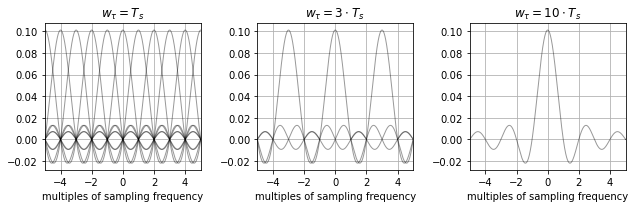

In [77]:
fig = plt.figure(figsize=(9,3))
plt.subplot(1,3,1)
plt.title('$w_\\tau = T_s$')
for k in range(-timewidth, timewidth):
    plt.plot((f)+k, Pf, 'k', alpha=0.4, linewidth=1)
    plt.xlim([-timewidth, timewidth])

plt.xlim([-timewidth/2, timewidth/2])
plt.grid()
plt.xlabel('multiples of sampling frequency')

pad_num = 1000000
P_int = np.zeros(np.pad(Pf, pad_num).shape)
for k in range(-timewidth, timewidth):
    P_int += np.roll(np.pad(Pf, pad_num), k*1000)
    
P_int = P_int[pad_num:-pad_num]
#plt.plot(f, P_int)

plt.subplot(1,3,2)
plt.xlabel('multiples of sampling frequency')
plt.title('$w_\\tau = 3 \\cdot T_s$')
for k in range(-timewidth, timewidth):
    plt.plot((f)+3*k, Pf, 'k', alpha=0.4, linewidth=1)
    plt.xlim([-timewidth, timewidth])
plt.xlim([-timewidth/2, timewidth/2])
plt.grid()

pad_num = 1000000
P_int = np.zeros(np.pad(Pf, pad_num).shape)
for k in range(-timewidth, timewidth):
    P_int += np.roll(np.pad(Pf, pad_num), 3*k*1000)
    
P_int = P_int[pad_num:-pad_num]
#plt.plot(f, P_int, zorder=0)

plt.subplot(1,3,3)
plt.xlabel('multiples of sampling frequency')
plt.title('$w_\\tau = 10 \\cdot T_s$')
for k in range(-timewidth, timewidth):
    plt.plot((f)+10*k, Pf, 'k', alpha=0.4, linewidth=1)
    plt.xlim([-timewidth, timewidth])

plt.xlim([-timewidth/2, timewidth/2])

pad_num = 1000000
P_int = np.zeros(np.pad(Pf, pad_num).shape)
for k in range(-timewidth, timewidth):
    P_int += np.roll(np.pad(Pf, pad_num), 10*k*1000)
    
P_int = P_int[pad_num:-pad_num]
#plt.plot(f, P_int, zorder=0)

plt.tight_layout()
plt.grid()

plt.savefig('figures/sincs.png', dpi=300)

## Plot some more sinc functions

In [54]:
f = np.linspace(-10,10,10000)
tau1 = 1

delF = 0.5
sinc1 = np.sin(tau1*np.pi*f)/(tau1*np.pi*f)
sinc2 = np.sin(tau1*np.pi*(f-delF))/(tau1*np.pi*(f-delF))

modulator = np.sin(2*np.pi*f)

(0.0, 5.0)

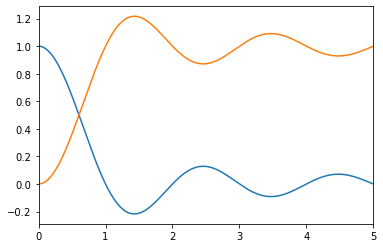

In [66]:
plt.plot(f, sinc1)
plt.plot(f, 1-sinc1)

plt.xlim([0,5])

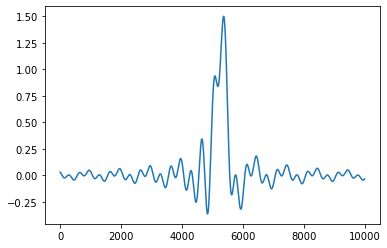

In [65]:
plt.plot(sinc1*modulator + sinc2*(1-modulator))